In [1]:
!unzip /content/dataset1.zip 


Archive:  /content/dataset1.zip
   creating: dataset1/
   creating: dataset1/test/
   creating: dataset1/test/Banana/
  inflating: dataset1/test/Banana/Banana 270.jpg  
  inflating: dataset1/test/Banana/Banana 271.jpg  
  inflating: dataset1/test/Banana/Banana 272.jpg  
  inflating: dataset1/test/Banana/Banana 273.jpg  
  inflating: dataset1/test/Banana/Banana 274.jpg  
  inflating: dataset1/test/Banana/Banana 275.jpg  
  inflating: dataset1/test/Banana/Banana 276.jpg  
  inflating: dataset1/test/Banana/Banana 278.jpg  
  inflating: dataset1/test/Banana/Banana 279.jpg  
  inflating: dataset1/test/Banana/Banana 280.jpg  
  inflating: dataset1/test/Banana/Banana 281.jpg  
  inflating: dataset1/test/Banana/Banana 282.jpg  
  inflating: dataset1/test/Banana/Banana 33.jpg  
  inflating: dataset1/test/Banana/Banana 34.jpg  
  inflating: dataset1/test/Banana/Banana 342.jpg  
  inflating: dataset1/test/Banana/Banana 343.jpg  
  inflating: dataset1/test/Banana/Banana 344.jpg  
  inflating: data

In [2]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


In [17]:
  trdata = ImageDataGenerator()
  traindata = trdata.flow_from_directory(directory="dataset1/train/",target_size=(128,128))
  tsdata = ImageDataGenerator()
  testdata = tsdata.flow_from_directory(directory="dataset1/test/", target_size=(128,128))

Found 4288 images belonging to 3 classes.
Found 588 images belonging to 3 classes.


In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2


from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

In [21]:
img_height,img_width = 128,128 
num_classes = 3
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = applications.resnet50.ResNet50(weights='imagenet', include_top=False, input_shape= (img_height,img_width,3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [22]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

In [0]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
hist = model.fit_generator(generator=traindata, validation_data= testdata, validation_steps=10,epochs=15,steps_per_epoch=10)

Epoch 1/15
10/10 [==============================] - 145s 14s/step - loss: 1.9781 - acc: 0.4219 - val_loss: 1.0323 - val_acc: 0.6344
Epoch 2/15
10/10 [==============================] - 126s 13s/step - loss: 1.2481 - acc: 0.6063 - val_loss: 0.6872 - val_acc: 0.7600
Epoch 3/15
10/10 [==============================] - 127s 13s/step - loss: 0.8634 - acc: 0.7156 - val_loss: 0.6801 - val_acc: 0.7875
Epoch 4/15
10/10 [==============================] - 125s 12s/step - loss: 0.6238 - acc: 0.7656 - val_loss: 0.3740 - val_acc: 0.8733
Epoch 5/15
10/10 [==============================] - 127s 13s/step - loss: 0.5364 - acc: 0.7937 - val_loss: 0.4848 - val_acc: 0.8625
Epoch 6/15
10/10 [==============================] - 127s 13s/step - loss: 0.3800 - acc: 0.8719 - val_loss: 0.4245 - val_acc: 0.8733
Epoch 7/15
10/10 [==============================] - 130s 13s/step - loss: 0.3374 - acc: 0.8906 - val_loss: 0.3972 - val_acc: 0.8875
Epoch 8/15
10/10 [==============================] - 125s 13s/step - loss: 0.

In [0]:
model.save('ResNet_model.h5')  

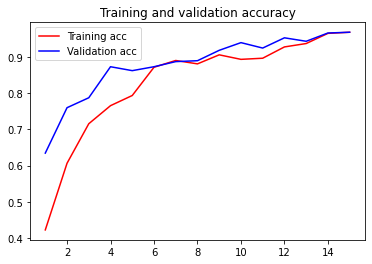

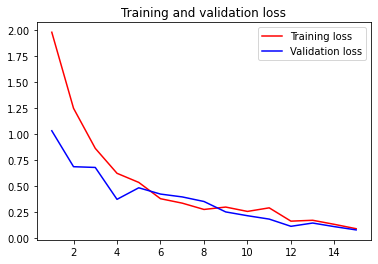

In [26]:
# plot the loss and accuracy
import matplotlib.pyplot as plt
%matplotlib inline

acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [27]:
!unzip /content/test.zip 

Archive:  /content/test.zip
   creating: Test/
   creating: Test/Banana/
  inflating: Test/Banana/Banana 1.jpg  
  inflating: Test/Banana/Banana 10.jpg  
  inflating: Test/Banana/Banana 11.jpg  
  inflating: Test/Banana/Banana 12.jpg  
  inflating: Test/Banana/Banana 13.jpg  
  inflating: Test/Banana/Banana 14.jpg  
  inflating: Test/Banana/Banana 15.jpg  
  inflating: Test/Banana/Banana 16.jpg  
  inflating: Test/Banana/Banana 2.jpg  
  inflating: Test/Banana/Banana 3.jpg  
  inflating: Test/Banana/Banana 4.jpg  
  inflating: Test/Banana/Banana 5.jpg  
  inflating: Test/Banana/Banana 6.jpg  
  inflating: Test/Banana/Banana 7.jpg  
  inflating: Test/Banana/Banana 8.jpg  
  inflating: Test/Banana/Banana 9.jpg  
   creating: Test/Bare Soil/
  inflating: Test/Bare Soil/Bare Soil 1.jpg  
  inflating: Test/Bare Soil/Bare Soil 10.jpg  
  inflating: Test/Bare Soil/Bare Soil 11.jpg  
  inflating: Test/Bare Soil/Bare Soil 12.jpg  
  inflating: Test/Bare Soil/Bare Soil 13.jpg  
  inflating: Test

In [54]:
classes = traindata.class_indices    
print(classes)



{'Banana': 0, 'Bare Soil': 1, 'Sugarcane': 2}


In [51]:
tsdata1 = ImageDataGenerator()
testdata1 = tsdata1.flow_from_directory(directory="Test/", target_size=(128,128))

Found 48 images belonging to 3 classes.


In [53]:
preds = model.evaluate(testdata)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2/2 [==============================] - 4s 2s/step
Loss = 1.5241785844167073
Test Accuracy = 0.4166666666666667
